# <span style="color:blue">Module-7<span>

# Import all libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings #for suppressing warnings
warnings.filterwarnings("ignore")

#

# Let us load the data

In [ ]:
application_df = pd.read_csv("application_data.csv")
prev_ap_df = pd.read_csv("previous_application.csv")

# Let us  do the routine structure check

In [ ]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prev_ap_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


###### Checking number of feature and their datatype in both dataframe

In [ ]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
application_df.shape

(307511, 122)

In [ ]:
prev_ap_df.shape

(1670214, 37)

###### <span style="color:lime">Observation</span>

~> application_df contains 121 features, 1 target variable, and 307511 rows

   (out of which 65 features are float64, 41 features are integer, 16 features are object datatype)
    
~> prev_ap_df contain 37 features and 1670214 rows

   (out of which 15 features are float64, 6 features are integer, 16 features are object datatype)

In [ ]:
# common and additional columns in both the dataframe
additional_feat = []
common_feat = []

for col in application_df.columns:
    if col not in prev_ap_df.columns:
        additional_feat.append(col)
    else:
        common_feat.append(col)

print(len(additional_feat))
print(len(common_feat))
print(common_feat)


114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


###### <span style="color:lime">Observation</span>

SK_ID_CURR is an unique identifier, which will use to merge the relevant columns of 2 dataframe

# Data Cleaning

In [ ]:
prev_ap_df.isna().mean() * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

###### <span style="color:lime">Observation</span>

We can use the previous applications to understand whether an client is new or not. If an client is a returing one, we can use the data to understand information like whether the previous one was a successful or failure, and why. If successful, is the loan over or not, was there any due or not

In [ ]:
prev_ap_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [ ]:
prev_ap_df.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [ ]:
# let us keep only the last application of all previous applications and drop rest
prev_ap_df = prev_ap_df[prev_ap_df.FLAG_LAST_APPL_PER_CONTRACT == 'Y']
prev_ap_df.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    1.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [ ]:
prev_ap_df.NFLAG_LAST_APPL_IN_DAY.value_counts(normalize=True)

1    0.999527
0    0.000473
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

In [ ]:
# Looks like there are still too many prev applications, so let us sort it based on application id (highest being the last)
#  and drop duplicates.

prev_ap_df = prev_ap_df.sort_values('SK_ID_PREV', ascending=False).drop_duplicates('SK_ID_CURR')

In [ ]:
prev_ap_df[prev_ap_df.DAYS_TERMINATION > 0].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
888701,2843497,451578,Cash loans,9175.185,132482.97,149969.97,NaN,132482.97,WEDNESDAY,11,...,XNA,24.0,middle,Cash Street: middle,365243.0,-588.0,102.0,365243.0,365243.0,1.0
1345642,2843496,425374,Revolving loans,31500.000,630000.00,630000.00,NaN,630000.00,THURSDAY,15,...,XNA,0.0,XNA,Card X-Sell,-454.0,-423.0,365243.0,365243.0,365243.0,0.0
298226,2843493,337804,Revolving loans,2250.000,45000.00,45000.00,NaN,45000.00,THURSDAY,17,...,XNA,0.0,XNA,Card Street,-438.0,-410.0,365243.0,365243.0,365243.0,0.0
1489940,2843491,107385,Cash loans,25421.985,841500.00,963684.00,NaN,841500.00,FRIDAY,12,...,XNA,60.0,low_action,Cash X-Sell: low,365243.0,-274.0,1496.0,365243.0,365243.0,1.0
728908,2843487,424008,Consumer loans,7179.795,78402.87,78399.00,3.87,78402.87,FRIDAY,15,...,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-233.0,97.0,365243.0,365243.0,0.0


In [ ]:
prev_ap_df.shape

(338857, 37)

The columns of interest from this dataset are SK_ID_CURR, AMT_CREDIT, NAME_CONTRACT_STATUS, CODE_REJECT_REASON, NAME_YIELD_GROUP and DAYS_TERMINATION. Let us keep those and drop the rest.

In [ ]:
prev_ap_df1 = prev_ap_df[['SK_ID_CURR', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_YIELD_GROUP', 'DAYS_TERMINATION']]
prev_ap_df1.head()

,SK_ID_CURR,AMT_CREDIT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_YIELD_GROUP,DAYS_TERMINATION
205485,406596,30912.75,Unused offer,CLIENT,XNA,NaN
717142,140761,41499.00,Unused offer,CLIENT,XNA,NaN
886179,237546,60673.50,Refused,LIMIT,middle,NaN
359118,100125,59503.50,Refused,SCO,middle,NaN
70058,250234,108180.00,Refused,SCO,low_action,NaN


Rename the column names into something meaningful in context of current application

In [ ]:
names = {'AMT_CREDIT': 'PREV_AMT_CREDIT', 'NAME_CONTRACT_STATUS': 'PREV_CONTRACT_STATUS',
         'DAYS_TERMINATION':'PREV_DAYS_TERMINATION', 'CODE_REJECT_REASON':'PREV_REJECT_REASON',
        'NAME_YIELD_GROUP':'PREV_YIELD_GROUP'}

prev_ap_df1 = prev_ap_df1.rename(columns=names)
prev_ap_df1.head()

,SK_ID_CURR,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
205485,406596,30912.75,Unused offer,CLIENT,XNA,NaN
717142,140761,41499.00,Unused offer,CLIENT,XNA,NaN
886179,237546,60673.50,Refused,LIMIT,middle,NaN
359118,100125,59503.50,Refused,SCO,middle,NaN
70058,250234,108180.00,Refused,SCO,low_action,NaN


Fix anomalies in the PREV_DAYS_TERMINATION columns

In [ ]:
prev_ap_df1.PREV_DAYS_TERMINATION.value_counts(normalize=True)

 365243.0    0.232947
-9.0         0.000911
-15.0        0.000906
-17.0        0.000902
-144.0       0.000902
               ...   
-2760.0      0.000004
-2768.0      0.000004
-2801.0      0.000004
-2844.0      0.000004
-2790.0      0.000004
Name: PREV_DAYS_TERMINATION, Length: 2785, dtype: float64

In [ ]:
prev_ap_df1.PREV_DAYS_TERMINATION[prev_ap_df1.PREV_DAYS_TERMINATION > 0].value_counts()

365243.0    56283
Name: PREV_DAYS_TERMINATION, dtype: int64

The value 365243 denotes an impossible value, may be it is an infinite date, and hence, can be replaced by NaN



In [ ]:
# Replace 635243 values with NaN

prev_ap_df1.PREV_DAYS_TERMINATION.replace({365243.0 : np.NaN}, inplace=True)
prev_ap_df1.PREV_DAYS_TERMINATION[prev_ap_df1.PREV_DAYS_TERMINATION > 0].value_counts()

Series([], Name: PREV_DAYS_TERMINATION, dtype: int64)

Now let us merge the prev applications to current application data set, using left join, so that we do not lose any entries in the current one

In [ ]:
application_df = pd.merge(left=application_df,right=prev_ap_df1, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,179055.0,Approved,XAP,low_normal,-17.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,348637.5,Approved,XAP,middle,-639.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,20106.0,Approved,XAP,middle,-714.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,0.0,Canceled,XAP,XNA,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,284400.0,Approved,XAP,middle,NaN


In [ ]:
application_df.PREV_CONTRACT_STATUS.isna().mean()

0.05350702901684818

In [ ]:
# fill na columns in PREV_CONTRACT_STATUS with FirstApplication

application_df.PREV_CONTRACT_STATUS.fillna('FirstApplication', inplace=True)
application_df.PREV_CONTRACT_STATUS.isna().mean()

0.0

In [ ]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 127 entries, SK_ID_CURR to PREV_DAYS_TERMINATION
dtypes: float64(67), int64(41), object(19)
memory usage: 300.3+ MB


###### Extracting the numeric feature from previous application data

In [ ]:
numeric_features = []
for col in prev_ap_df.columns:
    if prev_ap_df[col].dtype == float or prev_ap_df[col].dtype == int:
        numeric_features.append(col)

print(numeric_features)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [ ]:
prev_num_df = pd.DataFrame()

for col in numeric_features:
    prev_num_df[col] = prev_ap_df[col]

prev_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 205485 to 523289
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AMT_ANNUITY                283220 non-null  float64
 1   AMT_APPLICATION            338857 non-null  float64
 2   AMT_CREDIT                 338857 non-null  float64
 3   AMT_DOWN_PAYMENT           201633 non-null  float64
 4   AMT_GOODS_PRICE            281010 non-null  float64
 5   RATE_DOWN_PAYMENT          201633 non-null  float64
 6   RATE_INTEREST_PRIMARY      2017 non-null    float64
 7   RATE_INTEREST_PRIVILEGED   2017 non-null    float64
 8   CNT_PAYMENT                283223 non-null  float64
 9   DAYS_FIRST_DRAWING         241613 non-null  float64
 10  DAYS_FIRST_DUE             241613 non-null  float64
 11  DAYS_LAST_DUE_1ST_VERSION  241613 non-null  float64
 12  DAYS_LAST_DUE              241613 non-null  float64
 13  DAYS_TERMINATION        

###### Checking correlation between numeric feature of previous application data

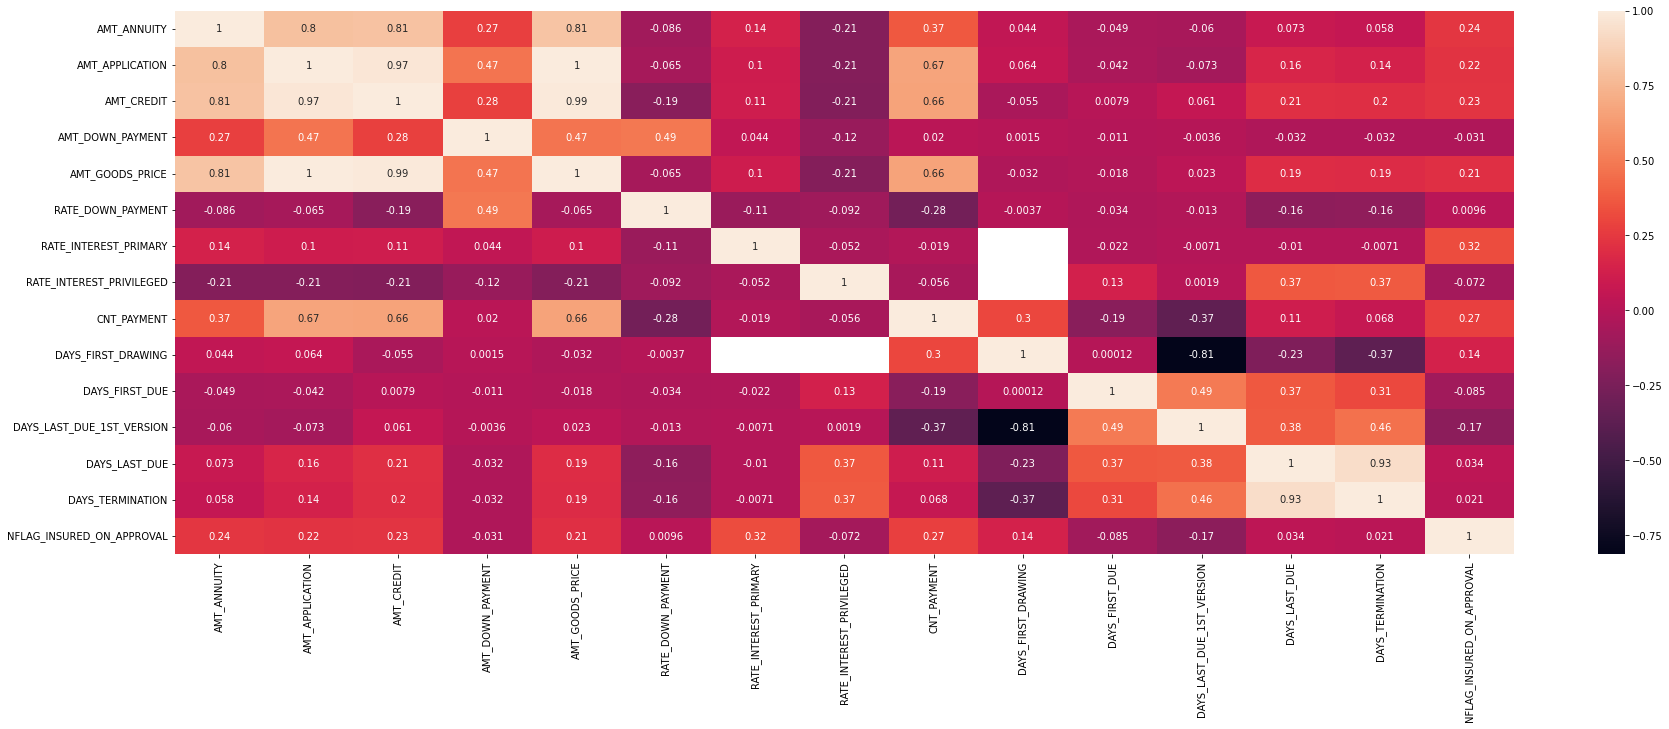

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(prev_num_df.corr(), annot=True)
plt.show()

###### <span style="color:lime">Observation</span>

1. DAYS_LAST_DUE and DAYS_TERMINATION are highly correlated
2. DAYS_FIRST_DRAWING and DAYS_LAST_DUE_1ST_VERSION have highly negative correlation
3. AMT_ANNUTY, AMT_APPLICATION, AMT_CREDIT, AMT_GGODS_PRICE are highly correlated
4. SK_ID_PREV column is not required for analysis

In [ ]:
prev_ap_df.drop(["SK_ID_PREV"], axis=1, inplace=True)

In [ ]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 205485 to 523289
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   338857 non-null  int64  
 1   NAME_CONTRACT_TYPE           338857 non-null  object 
 2   AMT_ANNUITY                  283220 non-null  float64
 3   AMT_APPLICATION              338857 non-null  float64
 4   AMT_CREDIT                   338857 non-null  float64
 5   AMT_DOWN_PAYMENT             201633 non-null  float64
 6   AMT_GOODS_PRICE              281010 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   338857 non-null  object 
 8   HOUR_APPR_PROCESS_START      338857 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  338857 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       338857 non-null  int64  
 11  RATE_DOWN_PAYMENT            201633 non-null  float64
 12  RATE_INTEREST_PRIMARY        2017 non-null    float64

In [ ]:
prev_ap_df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      96292
Family             49046
Spouse, partner    15611
Children            7026
Other_B             4166
Other_A             2192
Group of people      519
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
# filing missing values as unaccompanied as most common value

prev_ap_df["NAME_TYPE_SUITE"].fillna(prev_ap_df.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [ ]:
# merging only required columns of application_data with previous_application_data

prev_ap_merged =pd.merge(application_df[["SK_ID_CURR", "TARGET"]], prev_ap_df, how="left", on=["SK_ID_CURR"])
prev_ap_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           291057 non-null  object 
 3   AMT_ANNUITY                  244524 non-null  float64
 4   AMT_APPLICATION              291057 non-null  float64
 5   AMT_CREDIT                   291057 non-null  float64
 6   AMT_DOWN_PAYMENT             174566 non-null  float64
 7   AMT_GOODS_PRICE              242434 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   291057 non-null  object 
 9   HOUR_APPR_PROCESS_START      291057 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  291057 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       291057 non-null  float64
 12  RATE_DOWN_PAYMENT            174566 non-null  float64
 13 

In [ ]:
# Checking the numeric data

prev_ap_merged.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,307511.000000,307511.000000,244524.000000,2.910570e+05,2.910570e+05,1.745660e+05,2.424340e+05,291057.000000,291057.000000,174566.000000,...,1589.000000,291057.000000,2.910570e+05,244527.000000,209009.000000,209009.000000,209009.000000,209009.000000,209009.000000,209009.000000
mean,278180.518577,0.080729,14270.974864,1.539776e+05,1.695572e+05,7.122323e+03,1.848596e+05,12.656672,0.999519,0.081644,...,0.766406,-912.046293,4.175536e+02,14.298033,345250.269601,11293.649187,28166.788138,78018.611763,84728.409327,0.263759
std,102790.175348,0.272419,13371.468751,2.543718e+05,2.756381e+05,2.238333e+04,2.682789e+05,3.371055,0.021927,0.109616,...,0.100402,784.631651,1.299266e+04,12.429008,83215.620920,66096.700482,98547.729192,150597.241724,155006.170328,0.440671
min,100002.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.373150,-2922.000000,-1.000000e+00,0.000000,-2922.000000,-2891.000000,-2801.000000,-2883.000000,-2839.000000,0.000000
25%,189145.500000,0.000000,5890.410000,2.924100e+04,3.222000e+04,0.000000e+00,4.681443e+04,10.000000,1.000000,0.000000,...,0.715645,-1354.000000,-1.000000e+00,6.000000,365243.000000,-1544.000000,-1158.000000,-1233.000000,-1180.000000,0.000000
50%,278202.000000,0.000000,10125.000000,7.370100e+04,7.937100e+04,1.845000e+03,9.417600e+04,13.000000,1.000000,0.067330,...,0.835095,-625.000000,3.000000e+01,12.000000,365243.000000,-749.000000,-315.000000,-456.000000,-418.000000,0.000000
75%,367142.500000,0.000000,17519.118750,1.575000e+05,1.741410e+05,8.451000e+03,1.846035e+05,15.000000,1.000000,0.108914,...,0.852537,-302.000000,1.440000e+02,18.000000,365243.000000,-379.000000,82.000000,-53.000000,-25.000000,1.000000
max,456255.000000,1.000000,298557.585000,4.050000e+06,4.050000e+06,2.475000e+06,4.050000e+06,23.000000,1.000000,0.989740,...,0.867336,-2.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


###### <span style="color:lime">Observation</span>: Not dropping the rest of columns with missing values, will use them for further analysis

In [ ]:
#Data Cleaning for current application data
application_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 127 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

Data types looks intact, so no changes are needed at this point.

In [ ]:
# Find percentage of null values for each columns

application_df.isna().mean().round(4) * 100

SK_ID_CURR                0.00
TARGET                    0.00
NAME_CONTRACT_TYPE        0.00
CODE_GENDER               0.00
FLAG_OWN_CAR              0.00
                         ...  
PREV_AMT_CREDIT           5.35
PREV_CONTRACT_STATUS      0.00
PREV_REJECT_REASON        5.35
PREV_YIELD_GROUP          5.35
PREV_DAYS_TERMINATION    47.93
Length: 127, dtype: float64

There are null values more than 40% in columns related to apartment. Certain variables like apartment area in a high density region can give some insights to living conditions of the person. We can keep the APARTMENTS_AVG and drop rest.

In [ ]:
droppable_cols = application_df.loc[:,'BASEMENTAREA_AVG':'EMERGENCYSTATE_MODE'].columns
application_df.drop(droppable_cols, inplace=True, axis=1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Document flags also does not have much relevance in our analysis, since they are normally precursor to any loan application and banks dont go further without these. Moreover we dont have enough information in what these documents are. So we can drop those as well.

In [ ]:
droppable_cols = application_df.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns
application_df.drop(droppable_cols, inplace=True, axis=1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Handle missing values

In [ ]:
# Find percentage of null values for each columns

application_df.isna().mean().round(4) * 100

SK_ID_CURR                0.00
TARGET                    0.00
NAME_CONTRACT_TYPE        0.00
CODE_GENDER               0.00
FLAG_OWN_CAR              0.00
                         ...  
PREV_AMT_CREDIT           5.35
PREV_CONTRACT_STATUS      0.00
PREV_REJECT_REASON        5.35
PREV_YIELD_GROUP          5.35
PREV_DAYS_TERMINATION    47.93
Length: 61, dtype: float64

###### <span style="color:lime">Observation</span>:OCCUPATION_TYPE has 31% null values, which can be imputed with a occupation category 'Others'


In [ ]:
application_df.OCCUPATION_TYPE.fillna('Others', inplace = True)
application_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

###### <span style="color:lime">Observation</span>:EXT_SOURCE columns have significant nulls. These columns can be denoting scores given by external agencies. Since all applications doesnt have all the values, it ll be meaningfull if we take mean of these three for analysis. we can add a new column with average of the scores

In [ ]:
application_df['EXT_SOURCE_AVG'] = application_df.loc[:, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
application_df['EXT_SOURCE_AVG']

0         0.161787
1         0.466757
2         0.642739
3         0.650442
4         0.322738
            ...   
307506    0.413601
307507    0.115992
307508    0.499536
307509    0.587593
307510    0.518984
Name: EXT_SOURCE_AVG, Length: 307511, dtype: float64

# Handling Outliers

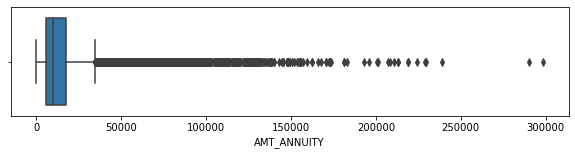

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged["AMT_ANNUITY"])
plt.show()

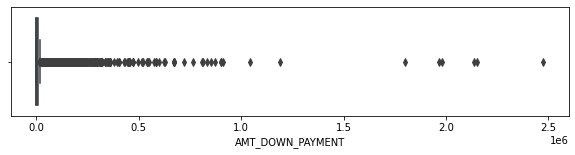

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged["AMT_DOWN_PAYMENT"])
plt.show()

In [ ]:
# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_DOWN_PAYMENT
prev_ap_merged = prev_ap_merged[prev_ap_merged["AMT_ANNUITY"] < np.nanpercentile(prev_ap_merged["AMT_ANNUITY"], 99)]
prev_ap_merged = prev_ap_merged[prev_ap_merged["AMT_DOWN_PAYMENT"] < np.nanpercentile(prev_ap_merged["AMT_DOWN_PAYMENT"], 99)]

###### Checking the feature after updating

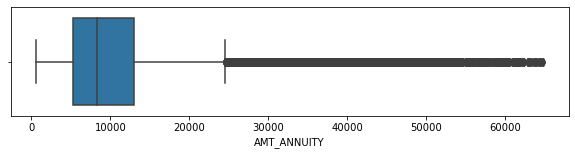

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged["AMT_ANNUITY"])
plt.show()

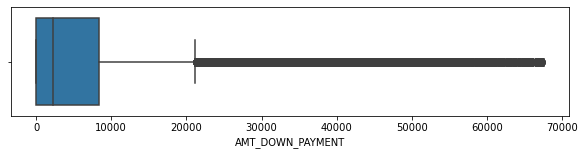

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged["AMT_DOWN_PAYMENT"])
plt.show()

###### Checking data imbalance in previous application data

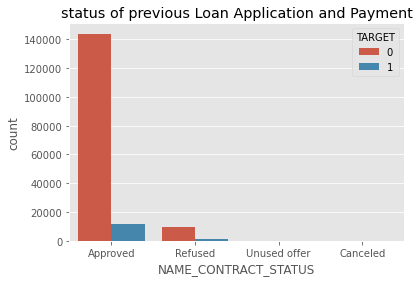

In [ ]:
plt.style.use("ggplot")
plt.title("status of previous Loan Application and Payment")
sns.countplot(prev_ap_merged["NAME_CONTRACT_STATUS"], hue=prev_ap_merged["TARGET"])
plt.show()

In [ ]:
# percentage of previous approved loan client that default in current loan

total_approved = prev_ap_merged[prev_ap_merged["NAME_CONTRACT_STATUS"] == "Approved"].shape[0]
default_approved = prev_ap_merged[(prev_ap_merged["TARGET"]==1) & (prev_ap_merged["NAME_CONTRACT_STATUS"] == "Approved")].shape[0]
default_approved*100/total_approved # percentage of previously approved loan application that dafaulted in current loan

7.489558568399409

In [ ]:
total_refused = prev_ap_merged[prev_ap_merged["NAME_CONTRACT_STATUS"] == "Refused"].shape[0]
nondefault_refused = prev_ap_merged[(prev_ap_merged["TARGET"]==0) & (prev_ap_merged["NAME_CONTRACT_STATUS"] == "Refused")].shape[0]
nondefault_refused*100/total_refused # percentage of previously approved loan application that dafaulted in current loan

90.58328762113732

###### <span style="color:lime">Observation</span>

1. The client which previous loans were approved are more likey to pay current loan in time , than the client whose previous loans were rejected
2. 7% of the previously approved loan clients that defaulted in current loan
3. 90% of the previously refused loan clients that were able to pay current loan

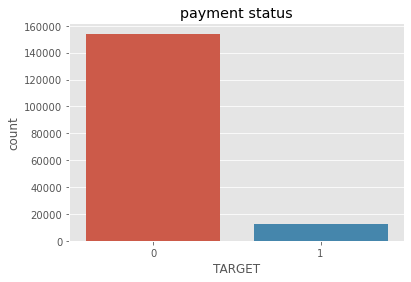

In [ ]:
plt.title("payment status")
sns.countplot(prev_ap_merged["TARGET"])
plt.show()

###### <span style="color:lime">Observation</span>: This data is highly imbalaced as number of defaulter is very less in total population

# univariate, Bivariate and Multivariate Analysis

In [ ]:
prev_ap_merged.FLAG_LAST_APPL_PER_CONTRACT.value_counts()
# FLAG_LAST_APPL_PER_CONTRACT can be dropped for having fixed value in all entries

Y    166787
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [ ]:
prev_ap_merged.NFLAG_LAST_APPL_IN_DAY.value_counts()
# NFLAG_LAST_APPL_IN_DAY can be dropped for having highly imbalance data

1.0    166718
0.0        69
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

# Analysis of numeric feature of Previous Application Data

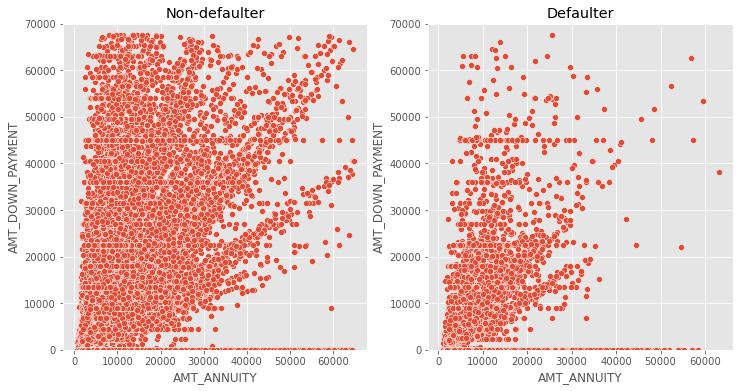

In [ ]:
# setting equal y-limit for both sub-plot for better comparison
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, ylim=(0,70000), title="Non-defaulter")
ax2 = fig.add_subplot(1,2,2, ylim=(0,70000), title="Defaulter")

sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]["AMT_ANNUITY"], prev_ap_merged[prev_ap_merged["TARGET"] ==0]["AMT_DOWN_PAYMENT"], ax=ax1)
sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]["AMT_ANNUITY"], prev_ap_merged[prev_ap_merged["TARGET"] ==1]["AMT_DOWN_PAYMENT"], ax=ax2)

plt.show()

###### <span style="color:lime">Observation</span>

~> Number of defaulters are less for larger amount of annuity of previous application

~> For higher down payment defaulter cases are less

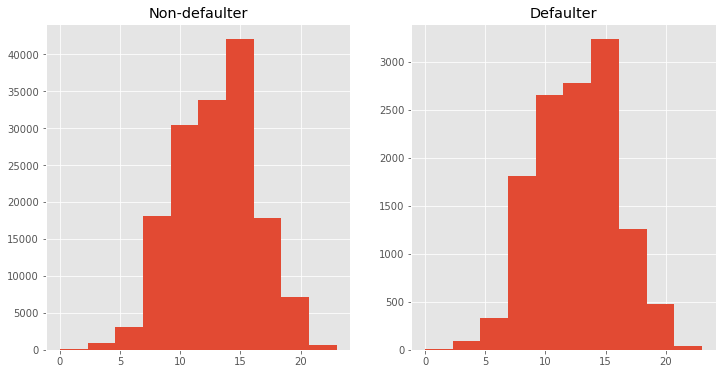

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title="Non-defaulter")
ax2 = fig.add_subplot(1,2,2, title="Defaulter")

prev_ap_merged[prev_ap_merged["TARGET"] == 0]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax = ax1)
prev_ap_merged[prev_ap_merged["TARGET"] == 1]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax = ax2)

plt.show()

###### <span style="color:lime">Observation</span>

~~> Most of the loans are applied around 15:00 hours . This feature is does not have visible impact on TARGET variable

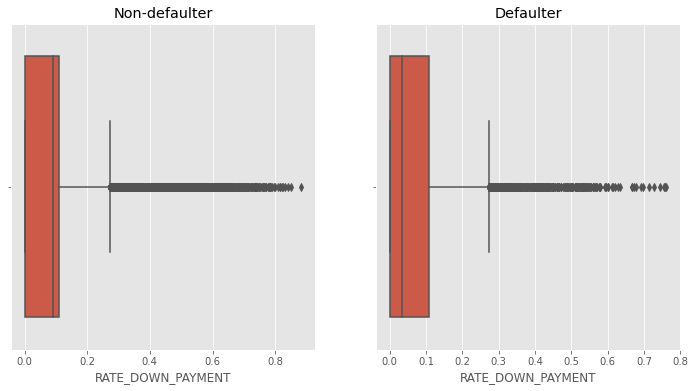

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1,  title="Non-defaulter")
ax2 = fig.add_subplot(1,2,2,  title="Defaulter")

sns.boxplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]["RATE_DOWN_PAYMENT"], ax=ax1)

sns.boxplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]["RATE_DOWN_PAYMENT"], ax=ax2)
plt.show()

in above both cases some outliers are present

# Checking the quantile values for exact percentile

In [ ]:
# percentile of RATE_DOWN_PAYMENT for non-defaulters
prev_ap_merged[prev_ap_merged["TARGET"] == 0]["RATE_DOWN_PAYMENT"].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.089404
0.70    0.108909
0.90    0.212399
0.95    0.289098
0.99    0.502950
Name: RATE_DOWN_PAYMENT, dtype: float64

In [ ]:
# percentile of RATE_DOWN_PAYMENT for defaulters
prev_ap_merged[prev_ap_merged["TARGET"] == 1]["RATE_DOWN_PAYMENT"].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.032554
0.70    0.104108
0.90    0.200849
0.95    0.241657
0.99    0.466625
Name: RATE_DOWN_PAYMENT, dtype: float64

###### <span style="color:lime">Observation</span>

~~> For those who had lower rate of down payment in previous application cases of default higher.

# Analysis of categorical feature of Previous Application Data

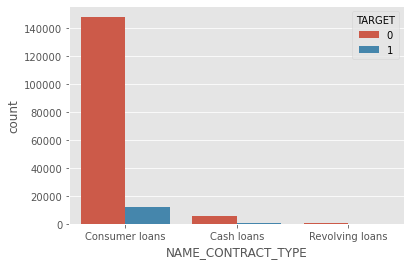

In [ ]:
sns.countplot(prev_ap_merged.NAME_CONTRACT_TYPE, hue=prev_ap_merged.TARGET)
plt.show()

###### <span style="color:lime">Observation</span>

 Highest number of loana are applied for Consumers loans

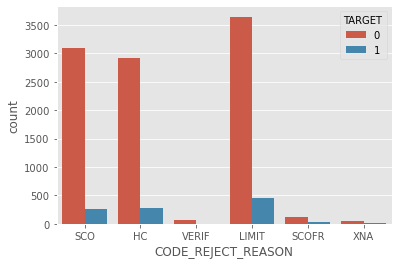

In [ ]:
sns.countplot(prev_ap_merged[prev_ap_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"], hue=prev_ap_merged.TARGET)
plt.show()

###### <span style="color:lime">Observation</span>

As seen in the above plot SCO, HC, LIMIT are most common reason of rejection

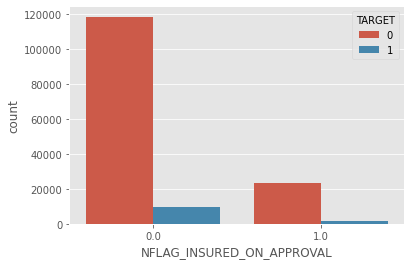

In [ ]:
sns.countplot(prev_ap_merged["NFLAG_INSURED_ON_APPROVAL"], hue=prev_ap_merged["TARGET"])
plt.show()

###### <span style="color:lime">Observation</span>

Most of the people did not request insurance during previous loan application

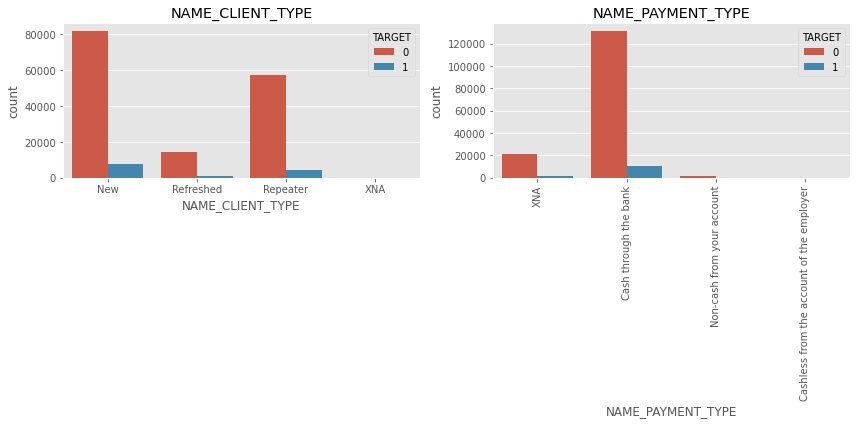

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1,  title="NAME_CLIENT_TYPE")
ax2 = fig.add_subplot(1,2,2,  title="NAME_PAYMENT_TYPE")

sns.countplot(prev_ap_merged["NAME_CLIENT_TYPE"], hue=prev_ap_merged["TARGET"], ax=ax1)

sns.countplot(prev_ap_merged["NAME_PAYMENT_TYPE"], hue=prev_ap_merged["TARGET"], ax=ax2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###### <span style="color:lime">Observation</span>

1. Most of the clients are repeaters
2. "Cash throughthe bank" is the most frequently use payment method

In [ ]:
# this gives percentile of defaulter in total clients having the same lable of the category.
# for example: in 100 clients, whose "NAME_GOODS_CATEGORY" is insurance
# approx, 10 people have payment difficulty


def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=["value", "percentage of Defaulter"])

    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({"value" : value, "percentage of Defaulter" : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by = "percentage of Defaulter", ascending=False)

In [ ]:
value_wise_defaulter_percentage(prev_ap_merged, "NAME_GOODS_CATEGORY")

,value,percentage of Defaulter
23,Insurance,25.000000
21,Direct Sales,10.185185
0,Vehicles,9.791922
12,Jewelry,9.244884
2,Mobile,8.885029
17,Sport and Leisure,8.683853
16,Office Appliances,8.644401
18,Auto Accessories,8.590442
6,Audio/Video,8.044622
5,Computers,7.834180


###### <span style="color:lime">Observation</span>

Higher percentage of defaulter cases are for the clients who previously applied for Insurance and Direct Sales

In [ ]:
value_wise_defaulter_percentage(prev_ap_merged, "NAME_PORTFOLIO")

,value,percentage of Defaulter
2,Cards,17.557252
0,POS,7.658150
1,Cash,5.631510
3,Cars,0.000000


###### <span style="color:lime">Observation</span>:For Cards  defaulter rate is highest

In [ ]:
value_wise_defaulter_percentage(prev_ap_merged, "NAME_PRODUCT_TYPE")

,value,percentage of Defaulter
1,walk-in,9.615385
0,XNA,7.658054
2,x-sell,5.333052


###### <span style="color:lime">Observation</span>: From all the walk-in clients 9% defaulted in current loan.

In [ ]:
value_wise_defaulter_percentage(prev_ap_merged, "CHANNEL_TYPE")

,value,percentage of Defaulter
4,AP+ (Cash loan),25.000000
3,Country-wide,7.925472
1,Regional / Local,7.614000
0,Stone,7.221873
2,Credit and cash offices,5.180457
5,Contact center,0.000000
6,Car dealer,0.000000


###### <span style="color:lime">Observation</span>: 15% loan client defaulted for AP+(Cash Loan)

In [ ]:
value_wise_defaulter_percentage(prev_ap_merged, "NAME_SELLER_INDUSTRY")

,value,percentage of Defaulter
0,Auto technology,10.305029
8,Jewelry,9.735974
2,Connectivity,9.001139
3,Consumer electronics,7.526542
6,Industry,6.495150
7,Construction,6.228374
9,MLM partners,5.882353
1,Furniture,5.558059
4,XNA,5.556842
5,Clothing,5.117566


###### <span style="color:lime">Observation</span>

~> In the seller industry "Auto technology" has highest rate of defaulter

~> Tourism has lowest numbeer of defaulter

In [ ]:
value_wise_defaulter_percentage(prev_ap_merged, "NAME_YIELD_GROUP")

,value,percentage of Defaulter
4,XNA,17.557252
3,high,8.661017
1,middle,7.557453
0,low_normal,6.738788
2,low_action,6.322107


###### <span style="color:lime">Observation</span>: Defaulter percentage is higher where NAME_YIELD_GROUP is not known

In [ ]:
value_wise_defaulter_percentage(prev_ap_merged, "PRODUCT_COMBINATION")

,value,percentage of Defaulter
15,Card X-Sell,100.000000
12,Card Street,17.399618
6,POS mobile with interest,9.071890
3,POS household with interest,7.878631
2,POS mobile without interest,7.553069
0,POS other with interest,7.271772
8,POS others without interest,6.722689
9,POS household without interest,6.625844
1,POS industry with interest,6.017515
10,Cash Street: high,5.782888


###### <span style="color:lime">Observation</span>: Highest percentage of default cases is for  Card X-Sell

# Analyze Current Application Data

### Approach of Application Data Analysis
###### ~> Importing Module
###### ~> Reading the Dataset into Pandas DataFrame
###### ~> We have divided the features into small segments and analyzed segment wise using a smaller dataframe containing  only relevent categories.
###### ~> Plots and percentage wise Defaulters calculation are done segment wise as well.

In [ ]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings #for suppressing warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.style.use("ggplot")

# Reading tha dataset

In [ ]:
application_df = pd.read_csv("application_data.csv")
prev_ap_df = pd.read_csv("previous_application.csv")

In [ ]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prev_ap_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
application_df.shape


(307511, 122)

In [ ]:
prev_ap_df.shape

(1670214, 37)

###### <span style="color:lime">Observation</span>

~> application_df contains 121 features, 1 target variable, and 307511 rows

   (out of which 65 features are float64, 41 features are integer, 16 features are object datatype)
    
~> prev_ap_df contain 37 features and 1670214 rows

   (out of which 15 features are float64, 6 features are integer, 16 features are object datatype)

# Handle Outliers

In [ ]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Analyse AMT_INCOME_TOTAL column for outliers

In [ ]:
application_df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

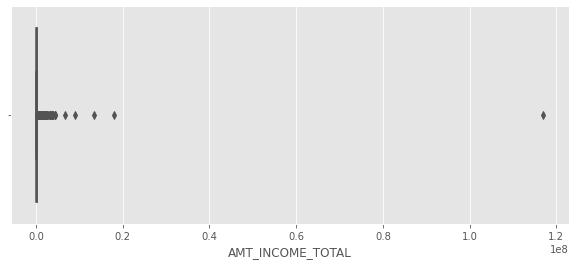

In [ ]:
plt.figure(figsize=[10,4])
sns.boxplot(application_df.AMT_INCOME_TOTAL)
plt.show()

###### <span style="color:lime">Observation</span>:We can see one entry which is way higher, lets analuze where different quantiles stay.

In [ ]:
application_df.AMT_INCOME_TOTAL.quantile([.5, .7, .9, .95, 0.99, 0.999, 0.9999])

0.5000     147150.0
0.7000     180000.0
0.9000     270000.0
0.9500     337500.0
0.9900     472500.0
0.9990     900000.0
0.9999    2250000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
# check the values lying outside 0.9999 quantile

application_df[application_df.AMT_INCOME_TOTAL > 0.2*10**8]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


###### <span style="color:lime">Observation</span>

In INCOME, there are outliers, but most of them, execpt one, are continuous and we can retain them, since INCOME is normally spread. But there is one single value which is way too high, and the loan applied is a normal amount, so it can be dropped. We are to be aware of that there are other outliers throughtout the analysis.

In [ ]:
application_df = application_df[~(application_df.AMT_INCOME_TOTAL > 0.2*10**8)]
application_df.shape

(307510, 122)

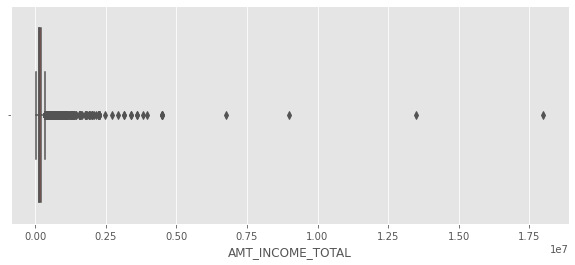

In [ ]:
# check the INCOME again

plt.figure(figsize=[10,4])
sns.boxplot(application_df.AMT_INCOME_TOTAL)
plt.show()

There are still many outliers in the Income variable. But these values are meaningful as it is spread more or less evenly, and we can keep those.

# Checking Data Imbalance

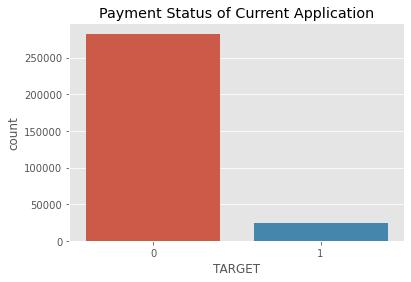

In [ ]:
plt.title("Payment Status of Current Application")
sns.countplot(application_df["TARGET"])
plt.show()

# Data Imbalance Ratio

In [ ]:
non_default = application_df[application_df["TARGET"] == 0]
default = application_df[application_df["TARGET"] ==1]

default.shape

(24824, 122)

In [ ]:
non_default.shape

(282686, 122)

In [ ]:
default.shape[0]*100/(default.shape[0]+non_default.shape[0])

8.072583005430717

###### <span style="color:lime">Observation</span>: This data is highly imbalanced as number of defaulter is very less in total application. Data imbalanced Ratio Default:Non-De faulter = 8:92=2:23

### Segment 1: Documents Submitted by client

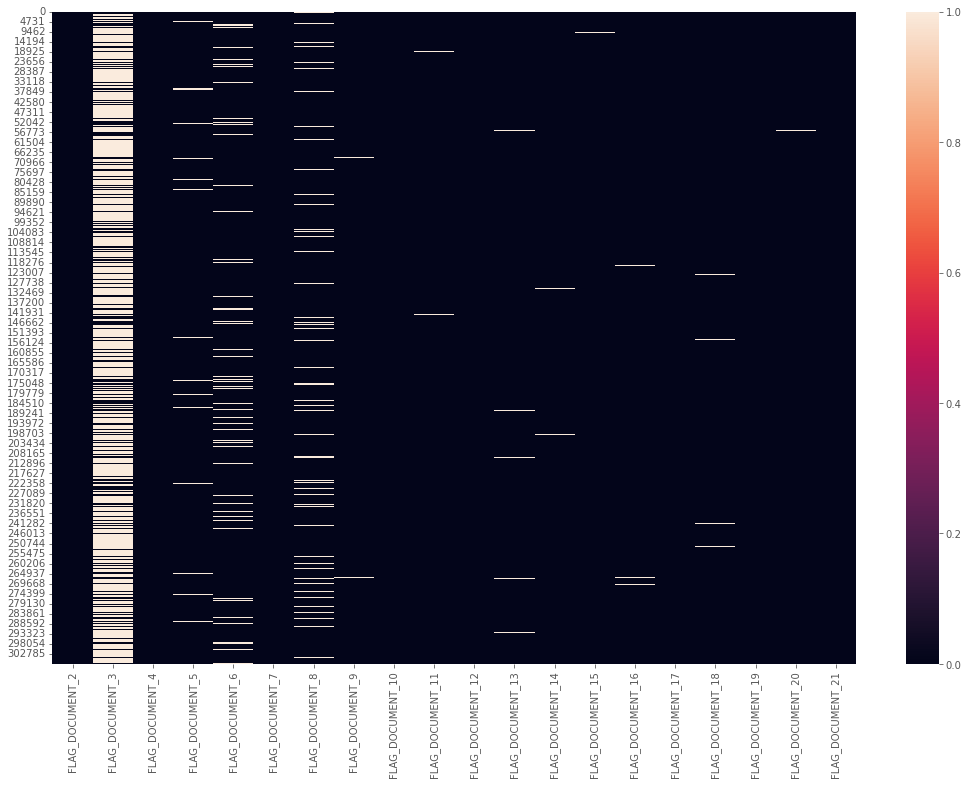

In [ ]:
# Here we are analyzing 'FLAG_DOCUMENT_2', 'FLAG_DUCUMENT_3', 'FLAG_DUCUMENT_21' columns our goals to understand whether trend of document submission and identify impact on TARGET variable
starting_idx = application_df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = application_df.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(application_df.iloc[:, starting_idx:ending_idx])
plt.show()

###### <span style="color:lime">Observation</span>

1. The heatmap suggests that all of the documents except Document 3 were not provided by clients in majority of the cases.
2. Hence we can assumen all the document(except document 3) will not contribute towards analyzing the data. Hence columns can be dropped

#### Checking both defaulter and non-defaulter entries to identify importance od Document 3

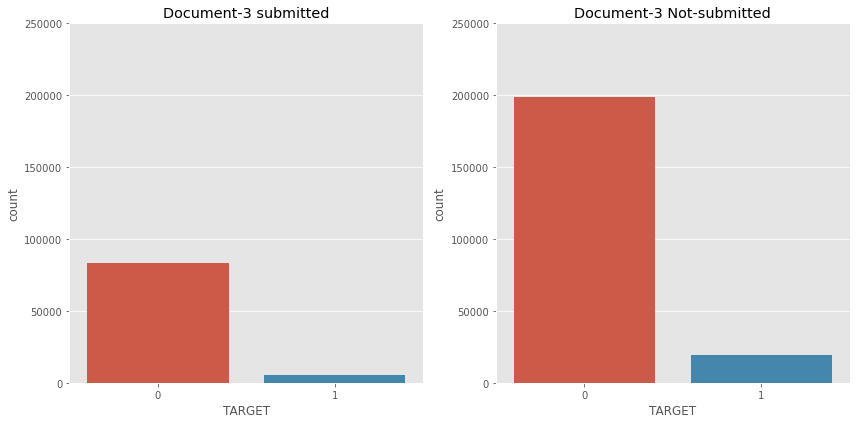

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, ylim=(0,250000), title="Document-3 submitted")
ax2 = fig.add_subplot(1,2,2, ylim=(0,250000), title="Document-3 Not-submitted")

sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)
sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=ax2)

plt.tight_layout()
plt.show()

###### <span style="color:lime">Observation</span>

1. FLAG_DOCUMENT_3 is showing simillar trend for both non_defaulter and defaulters
2. Hence this column can be dropped.

### Segment 2: Housing information of clients

In [ ]:
starting_idx = application_df.columns.get_loc("APARTMENTS_AVG")
ending_idx = application_df.columns.get_loc("EMERGENCYSTATE_MODE")

In [ ]:
housing_df = application_df.iloc[:, starting_idx:ending_idx+1]
housing_df["TARGET"] = application_df["TARGET"]
housing_df["NAME_HOUSING_TYPE"] = application_df["NAME_HOUSING_TYPE"]

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   APARTMENTS_AVG                151449 non-null  float64
 1   BASEMENTAREA_AVG              127567 non-null  float64
 2   YEARS_BEGINEXPLUATATION_AVG   157503 non-null  float64
 3   YEARS_BUILD_AVG               103023 non-null  float64
 4   COMMONAREA_AVG                92646 non-null   float64
 5   ELEVATORS_AVG                 143619 non-null  float64
 6   ENTRANCES_AVG                 152682 non-null  float64
 7   FLOORSMAX_AVG                 154490 non-null  float64
 8   FLOORSMIN_AVG                 98869 non-null   float64
 9   LANDAREA_AVG                  124920 non-null  float64
 10  LIVINGAPARTMENTS_AVG          97312 non-null   float64
 11  LIVINGAREA_AVG                153160 non-null  float64
 12  NONLIVINGAPARTMENTS_AVG       93997 non-null

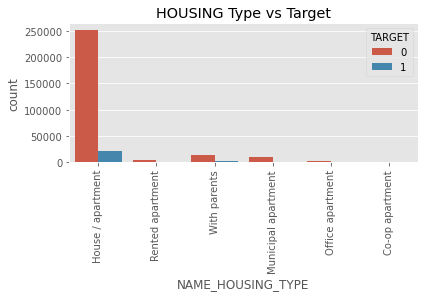

In [ ]:
plt.figure()
sns.countplot(application_df["NAME_HOUSING_TYPE"], hue=application_df["TARGET"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("HOUSING Type vs Target")
plt.show()

###### <span style="color:lime">Observation</span>

1. Most of the clients live in House/Apartment
2. Clients living with their parents or in rented apartment have higher rate of default.

### Segment 3 : Social Circle info

In [ ]:
start_idx = application_df.columns.get_loc("OBS_30_CNT_SOCIAL_CIRCLE")
end_idx = application_df.columns.get_loc("DEF_60_CNT_SOCIAL_CIRCLE")

social_circle_df = application_df.iloc[:, start_idx:end_idx+1]

In [ ]:
social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306489 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306489 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306489 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306489 non-null  float64
dtypes: float64(4)
memory usage: 19.8 MB


In [ ]:
social_circle_df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306489.000000,306489.000000,306489.000000,306489.000000
mean,1.422250,0.143421,1.405297,0.100049
std,2.400991,0.446699,2.379806,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


<AxesSubplot:>

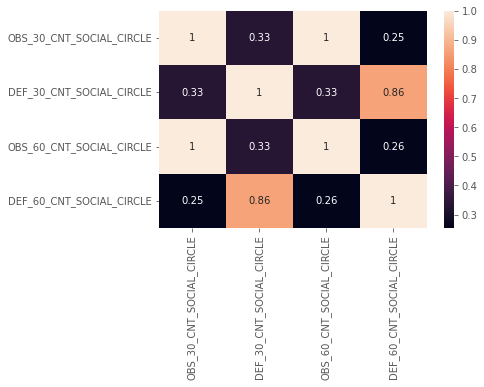

In [ ]:
sns.heatmap(social_circle_df.corr(), annot=True)

###### <span style="color:lime">Observation</span>

1. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
2. OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns

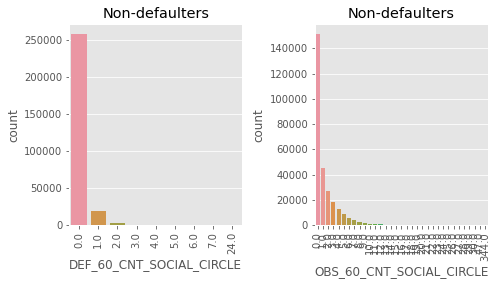

In [ ]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(["DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=non_default)
    plt.title("Non-defaulters")
    plt.xticks(rotation = 90)
    plt.tight_layout()

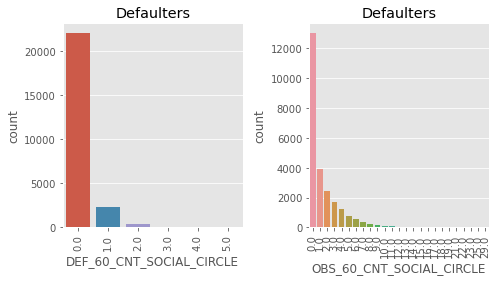

In [ ]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(["DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=default)
    plt.title("Defaulters")
    plt.xticks(rotation = 90)
    plt.tight_layout()

###### <span style="color:lime">Observation</span>:For  defaulter and non-defaulter 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE' features show similar trend

### Segment 4 : Region related data

In [ ]:
start_idx = application_df.columns.get_loc("REG_REGION_NOT_LIVE_REGION")
end_idx = application_df.columns.get_loc("LIVE_CITY_NOT_WORK_CITY")

region_df = application_df.iloc[:, start_idx:end_idx+1]

In [ ]:
region_df["REGION_RATING_CLIENT"] = application_df["REGION_RATING_CLIENT"]
region_df["REGION_RATING_CLIENT_W_CITY"] = application_df["REGION_RATING_CLIENT_W_CITY"]

In [ ]:
region_df["TARGET"] = application_df["TARGET"]

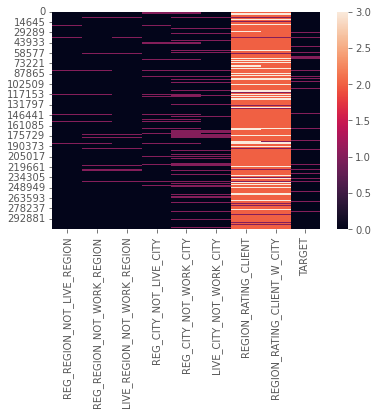

In [ ]:
sns.heatmap(region_df)
plt.show()

###### <span style="color:lime">Observation</span>

1. All the features are labeled as 0 and 1
2. REG_REGION_NOT_LIVE_REGION mostly contain 0, hence can be removed
3. REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed
4. REG_CITY_NOT_WORK_CITY,  LIVE_CITY_NOT_WORK_CITY columns are identical, hence one of them can be removed

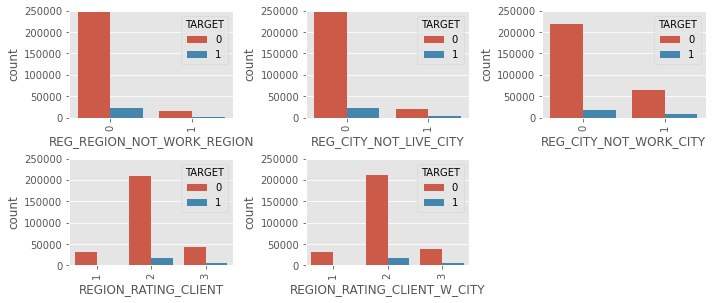

In [ ]:
fig=plt.subplots(figsize=(10,10))

for i, j in enumerate(["REG_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY"]):
    plt.subplot(5,3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue = application_df["TARGET"])
    plt.xticks(rotation = 90)
    plt.tight_layout()

###### <span style="color:lime">Observation</span>

1. Defaulter rate is highest when  REG_REGION_NOT_WORK_REGION=0 i.e permanent address and working address is same
2. Highest Application have Region rating of 2

### Segment 5 : Contact Related info

In [ ]:
contact_df = application_df[["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "DAYS_LAST_PHONE_CHANGE", "TARGET"]]

In [ ]:
contact_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              307510 non-null  int64  
 1   FLAG_EMP_PHONE          307510 non-null  int64  
 2   FLAG_WORK_PHONE         307510 non-null  int64  
 3   FLAG_CONT_MOBILE        307510 non-null  int64  
 4   FLAG_PHONE              307510 non-null  int64  
 5   FLAG_EMAIL              307510 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  307509 non-null  float64
 7   TARGET                  307510 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 29.2 MB


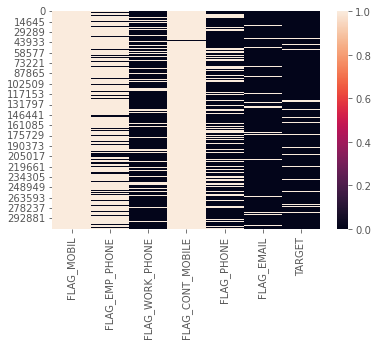

In [ ]:
plt.figure()
sns.heatmap(contact_df.drop("DAYS_LAST_PHONE_CHANGE", axis=1))
plt.show()

###### <span style="color:lime">Observation</span>

1. All mthe features in contact_df are categorical (0 and 1)
2. As there no similarity of patterns of TARGET value with the features, we are assumnig the feature are not useful for analysis.
3. Hence all of the features can be removed

### Segment 6 : Asset Details

In [ ]:
application_df[["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "OWN_CAR_AGE", "TARGET"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307510 non-null  object 
 1   FLAG_OWN_REALTY  307510 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307510 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 19.8+ MB


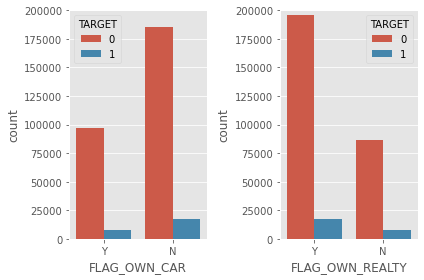

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1, ylim=(0,200000))
ax2 = fig.add_subplot(1,2,2, ylim=(0,200000))

sns.countplot(application_df["FLAG_OWN_CAR"], hue = application_df["TARGET"], order=["Y", "N"], ax=ax1)
sns.countplot(application_df["FLAG_OWN_REALTY"], hue = application_df["TARGET"], order=["Y", "N"], ax=ax2)
plt.tight_layout()
plt.show()

###### <span style="color:lime">Observation</span>

1. Most of the clients own realty
2. Most of the clients do not own car
3. People not owning reality and car and have a slightly higher default tare than the people who own reality and car

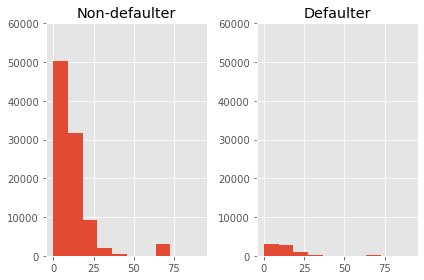

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1, ylim=(0,60000), title="Non-defaulter")
ax2 = fig.add_subplot(1,2,2, ylim=(0,60000), title="Defaulter")

non_default["OWN_CAR_AGE"].hist(bins=10, ax=ax1)
default["OWN_CAR_AGE"].hist(bins=10, ax=ax2)

plt.tight_layout()
plt.show()

###### <span style="color:lime">Observation</span>

~> Defauylter or not, most clients have car age between 0-25 years.

~> Since for both target value, trend is similiar, this feature can dropped.


### Segment 7 : Family Related info

In [ ]:
application_df[["CNT_CHILDREN", "CNT_FAM_MEMBERS", "NAME_FAMILY_STATUS"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307510 non-null  int64  
 1   CNT_FAM_MEMBERS     307508 non-null  float64
 2   NAME_FAMILY_STATUS  307510 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ MB


In [ ]:
# dropping the raws(2) with null value in CNT_FAM_MEMBERS
application_df = application_df.dropna(subset = ["CNT_FAM_MEMBERS"])
application_df[["CNT_CHILDREN", "CNT_FAM_MEMBERS", "NAME_FAMILY_STATUS"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307508 non-null  int64  
 1   CNT_FAM_MEMBERS     307508 non-null  float64
 2   NAME_FAMILY_STATUS  307508 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


In [ ]:
# Sincce number of family member cannot have fraction, converting into integer

application_df["CNT_FAM_MEMBERS"] = application_df["CNT_FAM_MEMBERS"].astype(int)
application_df[["CNT_FAM_MEMBERS"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   CNT_FAM_MEMBERS  307508 non-null  int32
dtypes: int32(1)
memory usage: 3.5 MB


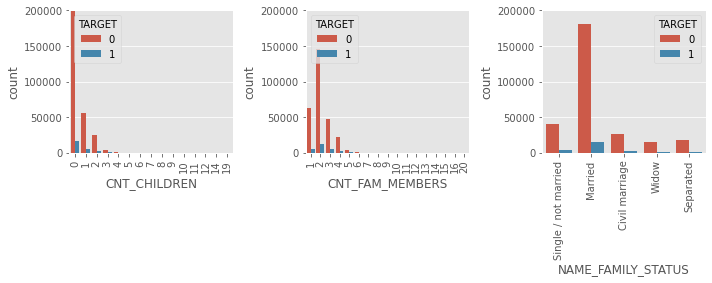

In [ ]:
fig=plt.subplots(figsize=(10,10))

for i, j in enumerate(["CNT_CHILDREN", "CNT_FAM_MEMBERS", "NAME_FAMILY_STATUS"]):
    plt.subplot(3,3, i+1, ylim=(0, 200000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue = application_df["TARGET"])
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [ ]:
value_wise_defaulter_percentage(application_df, "NAME_FAMILY_STATUS")

,value,percentage of Defaulter
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559397
3,Widow,5.824217


In [ ]:
value_wise_defaulter_percentage(application_df, "CNT_CHILDREN")

,value,percentage of Defaulter
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,12.820513
3,3.0,9.631423
1,1.0,8.922085
2,2.0,8.721821
6,5.0,8.333333
0,0.0,7.711881
5,7.0,0.000000


In [ ]:
value_wise_defaulter_percentage(application_df, "CNT_FAM_MEMBERS")

,value,percentage of Defaulter
16,11.0,100.000000
10,13.0,100.000000
9,10.0,33.333333
8,8.0,30.000000
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.758555
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583498


In [ ]:
application_df.CNT_FAM_MEMBERS.value_counts()

2     158357
1      67847
3      52600
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

###### <span style="color:lime">Observation</span>

~~> Default rate is highest for Civil Manager and Single clients

~~> Most of the clients are married (and/or) no children (and/or) 2 family members

~~> Clients with relativly  more number of children (and/or) family members have higher default peercentage

~~> For some of the cases wher count children/family members high, and the default rate very high or very low. This cases cannot be takenas a conclusion as number of clients having a large family is very low.

### Segment 8 : Education and Occupaation info

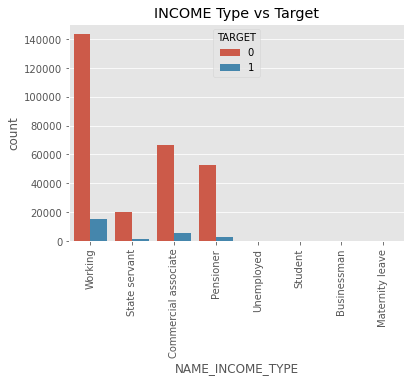

In [ ]:
plt.figure()
sns.countplot(application_df["NAME_INCOME_TYPE"], hue=application_df["TARGET"])
plt.xticks(rotation = 90)
plt.title("INCOME Type vs Target")
plt.show()

In [ ]:
value_wise_defaulter_percentage(application_df, "NAME_INCOME_TYPE")

,value,percentage of Defaulter
7,Maternity leave,40.000000
4,Unemployed,36.363636
0,Working,9.587902
2,Commercial associate,7.484466
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.000000
6,Businessman,0.000000


In [ ]:
application_df.NAME_INCOME_TYPE.value_counts()

Working                 158773
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

###### <span style="color:lime">Observation</span>

1. Most of the clients are working.
2. Clients on Matemity Leave and unemployed has highest percentage of Defaulter
3. Businessman have lowest(0) percentage of<Defaulter However clients of income type("Unemployed", "Student", "Businessman", "Matemity leave") are very few in the dataset to contribute in the analysis.

In [ ]:
value_wise_defaulter_percentage(application_df, "NAME_EDUCATION_TYPE")

,value,percentage of Defaulter
3,Lower secondary,10.930537
0,Secondary / secondary special,8.939512
2,Incomplete higher,8.484966
1,Higher education,5.355187
4,Academic degree,1.829268


###### <span style="color:lime">Observation</span>: Clients having "LOWER SECONDARY" education have highest percentage of Defaulter.

In [ ]:
application_df["OCCUPATION_TYPE"].isnull().value_counts()

False    211117
True      96391
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
application_df["OCCUPATION_TYPE"].value_counts()

Laborers                 55185
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
# imputing missing value for OCCUPATION TYPE as "unknown"

application_df["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)

In [ ]:
value_wise_defaulter_percentage(application_df, "OCCUPATION_TYPE")

,value,percentage of Defaulter
14,Low-skill Laborers,17.152413
5,Drivers,11.326130
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.577150
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


###### <span style="color:lime">Observation</span>: Low skilled laboures have very high rate of defaulters in comparison to other occupation

In [ ]:
application_df["CODE_GENDER"].isnull().sum()

0

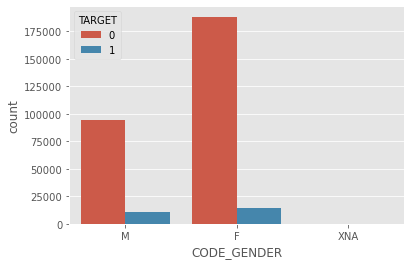

In [ ]:
sns.countplot(application_df["CODE_GENDER"], hue=application_df["TARGET"])
plt.show()

###### <span style="color:lime">Observation</span>

1. Female clients are more than male clients
2. Defualter percentage for male clients

In [ ]:
# converting DAYS_BIRTH to age
application_df["Age"] = application_df.DAYS_BIRTH//(-365.25)
application_df[["Age"]].describe()

,Age
count,307508.000000
mean,43.405228
std,11.945800
min,20.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,69.000000


In [ ]:
# Dropping the column as new column will be used for analysis

application_df.drop("DAYS_BIRTH", inplace=True, axis=1)

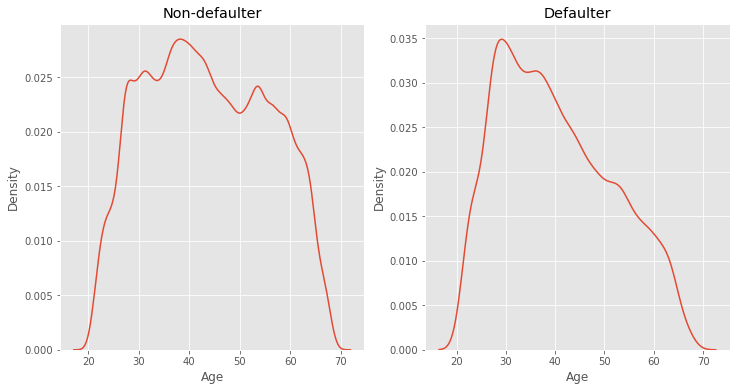

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title="Non-defaulter")
ax2 = fig.add_subplot(1,2,2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]["Age"], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]["Age"], ax=ax2)

plt.show()

###### <span style="color:lime">Observation</span>

1. People of age 30 have higher default rate
2. Default cases are lessfor clients more than 40 years old.

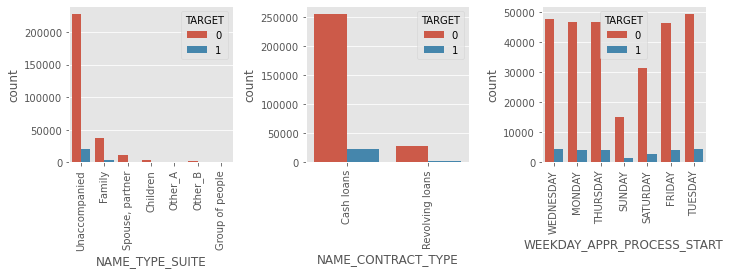

In [ ]:
fig=plt.subplots(figsize=(10,10))

for i, j in enumerate(["NAME_TYPE_SUITE", "NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START"]):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue = application_df["TARGET"])
    plt.xticks(rotation = 90)
    plt.tight_layout()

###### <span style="color:lime">Observation</span>

1. Most of the clients are unaccompanied while applying for loan
2. Number cash loans is quit higher than Removing loans
3. As weekdays have similar number of clients than weekend

### Income and Annuity

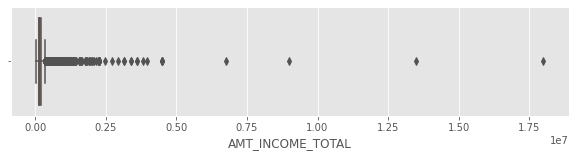

In [ ]:
plt.subplots(figsize=(10,2))
sns.boxplot(application_df["AMT_INCOME_TOTAL"])
plt.show()

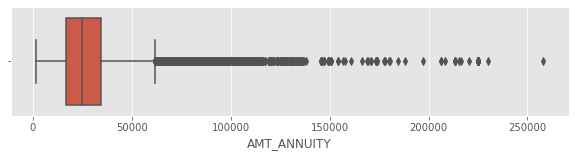

In [ ]:
plt.subplots(figsize=(10,2))
sns.boxplot(application_df["AMT_ANNUITY"])
plt.show()

In [ ]:
# boxplot is showing the outliers for income and annuity, there are few entries having very large annuity and income than others.
# consdering this entries will mislead the avg income of entire population and further analysis.
# excluding values outside 99 percentile for AMT_ANNUITY and ANT_INCOME_TOTAL

application_df = application_df[application_df["AMT_ANNUITY"] < np.nanpercentile(application_df["AMT_ANNUITY"], 99)]

In [ ]:
application_df = application_df[application_df["AMT_INCOME_TOTAL"] < np.nanpercentile(application_df["AMT_INCOME_TOTAL"], 99)]

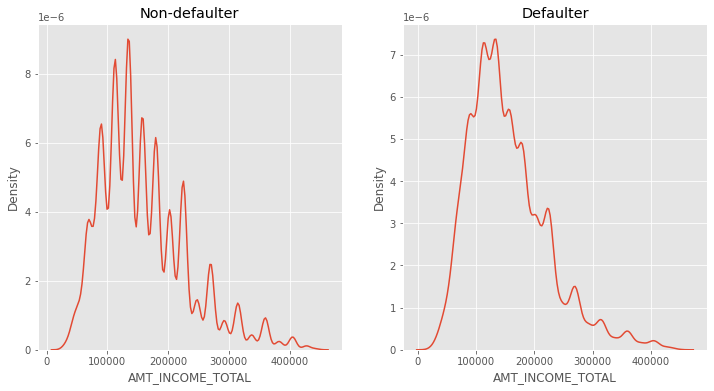

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title="Non-defaulter")
ax2 = fig.add_subplot(1,2,2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]["AMT_INCOME_TOTAL"], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]["AMT_INCOME_TOTAL"], ax=ax2)

plt.show()

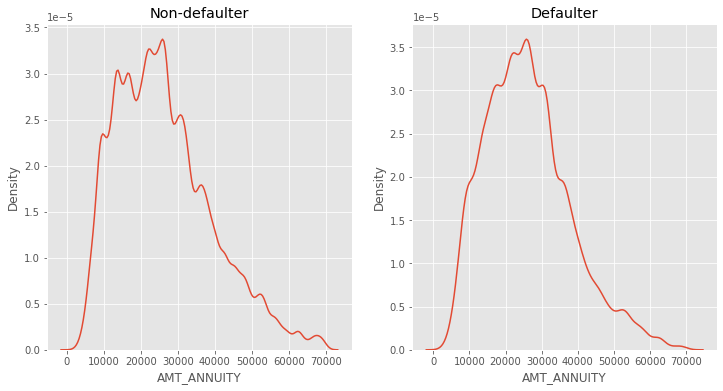

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title="Non-defaulter")
ax2 = fig.add_subplot(1,2,2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]["AMT_ANNUITY"], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]["AMT_ANNUITY"], ax=ax2)

plt.show()

###### <span style="color:lime">Observation</span>: For Defaulter and non-defaulter AMT_ANNUITY distribution is similar.

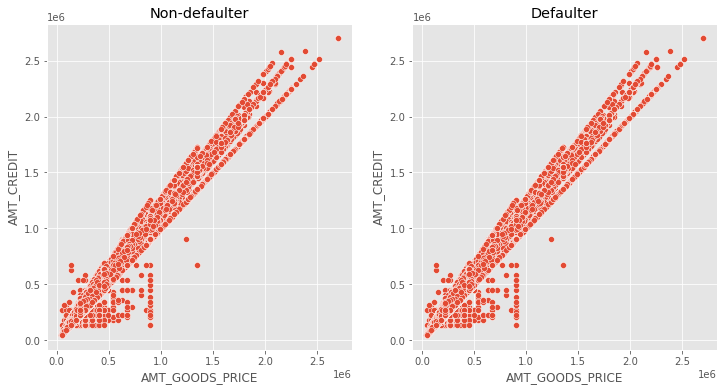

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title="Non-defaulter")
ax2 = fig.add_subplot(1,2,2, title="Defaulter")

sns.scatterplot(application_df[application_df["TARGET"] == 0]["AMT_GOODS_PRICE"], application_df[application_df["TARGET"] == 0]["AMT_CREDIT"], ax=ax1)
sns.scatterplot(application_df[application_df["TARGET"] == 0]["AMT_GOODS_PRICE"], application_df[application_df["TARGET"] == 0]["AMT_CREDIT"], ax=ax2)

plt.tight_layout
plt.show()

###### <span style="color:lime">Observation</span>

1. AMT_CREDIT AND AMT_GOODS_PRICE have linear ralation.
2. for lower range of AMT_CREDIT AND AMT_GOODS_PRICE, amount of defaulters is less than that of non-defaulters

In [ ]:
application_df[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_1  130064 non-null  float64
 1   EXT_SOURCE_2  298814 non-null  float64
 2   EXT_SOURCE_3  240038 non-null  float64
dtypes: float64(3)
memory usage: 9.1 MB


In [ ]:
application_df[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,130064.000000,2.988140e+05,240038.000000
mean,0.499680,5.121097e-01,0.510843
std,0.211062,1.912778e-01,0.194880
min,0.014568,8.173617e-08,0.000527
25%,0.331224,3.888098e-01,0.370650
50%,0.502826,5.634807e-01,0.535276
75%,0.672288,6.617584e-01,0.669057
max,0.962693,8.549997e-01,0.896010


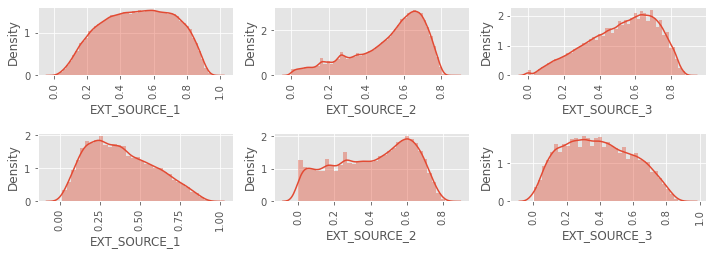

In [ ]:
fig=plt.subplots(figsize=(10,10))

for i, j in enumerate(["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]):
    if i < 3:
        target=0 # First row of non-defaulters
    else:
        target=1 # second row of non-defaulters
    plt.subplot(6,3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(application_df[application_df["TARGET"] == target][j])
    plt.xticks(rotation = 90)
    plt.tight_layout()

###### <span style="color:lime">Observation</span>:EXT_SOURCE_1 and EXT_SOURCE_3 have very diffrent distribution for defaulters and non-defaulters

### Top 10 correlation for Defaulters

In [ ]:
defaulter_corr = default.corr()
round(defaulter_corr, 2)
corr_list = defaulter_corr.unstack()

In [ ]:
# Listing the correlation in pair sorted in descending order

corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998269
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.998250
COMMONAREA_MEDI           COMMONAREA_AVG              0.998107
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998100
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_AVG     0.998075
FLOORSMIN_AVG             FLOORSMIN_MEDI              0.997825
LIVINGAPARTMENTS_AVG      LIVINGAPARTMENTS_MEDI       0.997668
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997187
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_MODE    0.997032
ENTRANCES_AVG             ENTRANCES_MEDI              0.996700
dtype: float64

### Top 10 correlation for Non-Defaulters

In [ ]:
nondefaulter_corr = non_default.corr()
round(defaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack()

In [ ]:
# Listing the correlation in pair sorted in descending order
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998522
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998508
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997202
FLOORSMAX_AVG             FLOORSMAX_MEDI              0.997018
ENTRANCES_AVG             ENTRANCES_MEDI              0.996899
ELEVATORS_AVG             ELEVATORS_MEDI              0.996161
COMMONAREA_AVG            COMMONAREA_MEDI             0.995857
LIVINGAREA_MEDI           LIVINGAREA_AVG              0.995568
APARTMENTS_AVG            APARTMENTS_MEDI             0.995163
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.994081
dtype: float64

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>